In [6]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
data = pd.read_csv("hour.csv")

In [8]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# FEATURE ANALYSIS

In [9]:
seasonMap = {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }

In [10]:
weatherMap = {1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
              2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
              3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
              4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }

In [11]:
data["date"] = data.dteday.apply(lambda x : x.split()[0])

In [14]:
data["weekday"] = data.date.apply\
(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data["weather"] = data.weathersit.map(weatherMap)

In [15]:
categoryVariableList  = ["hr","weekday","mnth","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [16]:
data = data.drop(["dteday"],axis=1)

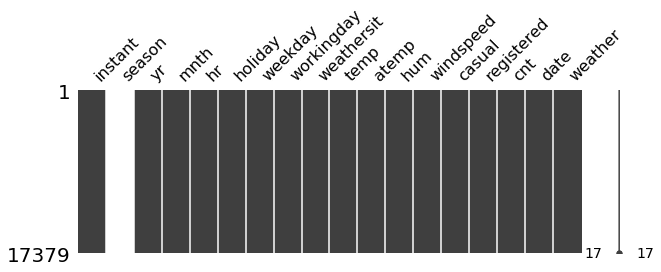

In [17]:
msno.matrix(data,figsize=(10,3));

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count/Working Day Distribution')]

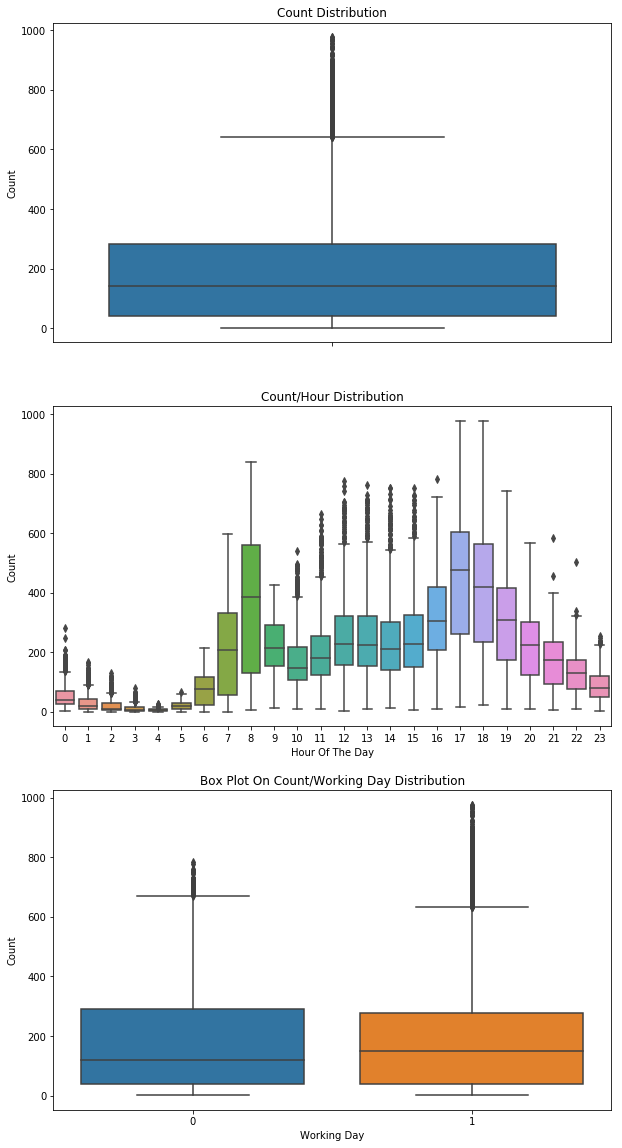

In [33]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,y="cnt",orient="v",ax=axes[0])
sn.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[1])
sn.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[2])

axes[0].set(ylabel='Count',title="Count Distribution")
axes[1].set(xlabel='Hour Of The Day', ylabel='Count',title="Count/Hour Distribution")
axes[2].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count/Working Day Distribution")

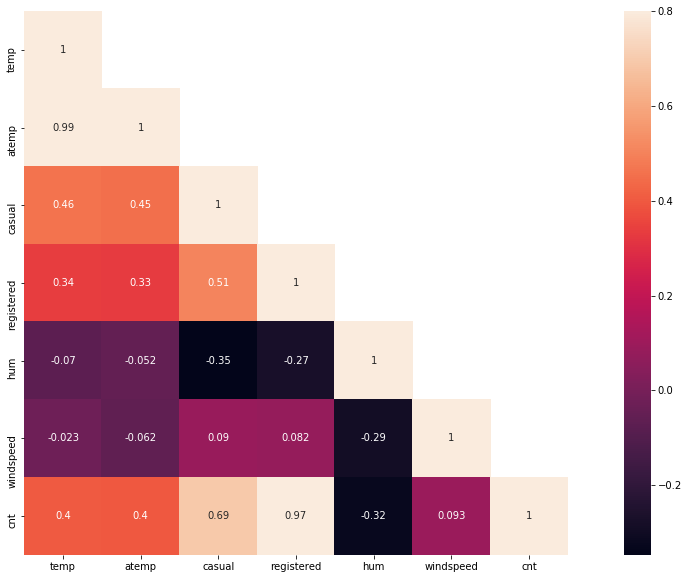

In [21]:
# Correlation analasys
corrMatt = data[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True);